In [19]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd

# file 
data_path = ['data2']
flist = ['cad2Datacontiguous.txt','cad3Datacontiguous.txt','cad4Datacontiguous.txt',
         'cad5Datacontiguous.txt','cad6Datacontiguous.txt','cad7Datacontiguous.txt',
         'cad8Datacontiguous.txt','cad9Datacontiguous.txt','cad10Datacontiguous.txt',
         'cad11Datacontiguous.txt','cad12Datacontiguous.txt']

fpaths = []
d = []
cols = ['id', 'Start', 'Action', 'Location']
for fitem in flist:
  fpaths.append(os.sep.join(data_path + [fitem]))

for fpath in fpaths:
  data = pd.read_csv(fpath, sep=',', names=cols, skiprows=0)
  #data['End'] = 
  print(data.head(10))

      id                Start       Action  Location
0  65569  2016-07-27 12:05:04         Diet   Kitchen
1  65570  2016-07-27 12:13:33      Walking  Bathroom
2  65571  2016-07-27 12:13:36   BedroomADL   Bedroom
3  65572  2016-07-27 12:17:21  UsingToilet  Bathroom
4  65573  2016-07-27 12:40:33   BedroomADL   Bedroom
5  65574  2016-07-27 12:40:40  UsingToilet  Bathroom
6  65575  2016-07-27 12:41:14   BedroomADL   Bedroom
7  65576  2016-07-27 12:41:39  UsingToilet  Bathroom
8  65577  2016-07-27 12:41:50   BedroomADL   Bedroom
9  65578  2016-07-27 12:42:13  UsingToilet  Bathroom
      id                Start         Action    Location
0  66253  2016-07-27 12:42:01        Walking     Bedroom
1  66254  2016-07-27 12:42:05       Sleeping     Bedroom
2  66255  2016-07-27 12:42:44    UsingToilet    Bathroom
3  66256  2016-07-27 12:45:33     BedroomADL     Bedroom
4  66257  2016-07-27 12:45:52       Sleeping     Bedroom
5  66258  2016-07-27 12:48:04           Diet     Kitchen
6  66259  2016-07-

FileNotFoundError: File b'data2/cad6Datacontiguous.txt' does not exist

In [11]:
d1 = data.copy(deep=True)
d2 = data2.copy(deep=True)
d1.head(5)

,Activity,Start_Time,End_Time
0,Sleeping,2011-11-28 02:27:59,2011-11-28 10:18:11
1,Toileting,2011-11-28 10:21:24,2011-11-28 10:23:36
2,Showering,2011-11-28 10:25:44,2011-11-28 10:33:00
3,Breakfast,2011-11-28 10:34:23,2011-11-28 10:43:00
4,Grooming,2011-11-28 10:49:48,2011-11-28 10:51:13


In [19]:
d1['Duration'] = (d1['End_Time'] - d1['Start_Time']).map(lambda x: x.seconds/60)
d2['Duration'] = (d2['End_Time'] - d2['Start_Time']).map(lambda x: x.seconds/60)
d1.head(5)

,Activity,Start_Time,End_Time,Duration
0,Sleeping,2011-11-28 02:27:59,2011-11-28 10:18:11,470.200000
1,Toileting,2011-11-28 10:21:24,2011-11-28 10:23:36,2.200000
2,Showering,2011-11-28 10:25:44,2011-11-28 10:33:00,7.266667
3,Breakfast,2011-11-28 10:34:23,2011-11-28 10:43:00,8.616667
4,Grooming,2011-11-28 10:49:48,2011-11-28 10:51:13,1.416667


In [27]:
# Filter
sd1 = d1[d1['Activity']=='Sleeping']
sd2 = d2[d2['Activity']=='Sleeping']
dd1 = pd.DataFrame(sd1.values,columns=['Activity', 'Start', 'End', 'Duration'])
dd2 = pd.DataFrame(sd2.values,columns=['Activity', 'Start', 'End', 'Duration'])
dd2.head()

,Activity,Start,End,Duration
0,Sleeping,2012-11-12 01:54:00,2012-11-12 09:31:59,457.983
1,Sleeping,2012-11-13 01:30:00,2012-11-13 08:52:59,442.983
2,Sleeping,2012-11-14 00:29:00,2012-11-14 05:12:59,283.983
3,Sleeping,2012-11-14 05:16:00,2012-11-14 09:01:59,225.983
4,Sleeping,2012-11-15 00:10:00,2012-11-15 00:39:59,29.9833


In [26]:
dd1['Hour'] = dd1['Start'].map(lambda x: x.hour + (x.minute/60))
dd2['Hour'] = dd2['Start'].map(lambda x: x.hour + (x.minute/60))
dd2.head()

,Activity,Start,End,Duration,Hour
0,Sleeping,2012-11-12 01:54:00,2012-11-12 09:31:59,457.983,1.900000
1,Sleeping,2012-11-13 01:30:00,2012-11-13 08:52:59,442.983,1.500000
2,Sleeping,2012-11-14 00:29:00,2012-11-14 05:12:59,283.983,0.483333
3,Sleeping,2012-11-14 05:16:00,2012-11-14 09:01:59,225.983,5.266667
4,Sleeping,2012-11-15 00:10:00,2012-11-15 00:39:59,29.9833,0.166667


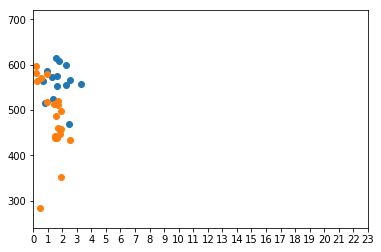

In [25]:
import matplotlib.pyplot as plt

plt.xlim(0, 23)
plt.xticks(range(24))
plt.ylim(240, 720)

plt.scatter(dd1['Hour'], dd1['Duration'])
plt.scatter(dd2['Hour'], dd2['Duration'])


plt.show()